# Install and import libraries

In [21]:
!pip install whit-phys-util

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import math

In [23]:
repo= buc.local_repository("https://github.com/WhitworthPhysics/transient-heat-flow-CalvinMPayne")

Repository exists at this location. Pulling changes from GitHub.


# Equipment and Materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
|2x Thermometer| Fluke | 54 2B |40430763WS|
|Thermocouples| Fluke |4048|N/A|
|Styrofoam Cups|N/A|N/A|N/A|
|Rubber Bands|N/A|N/A|N/A|

# Analysis

In [24]:
thicc=3.8*10**-3 #this is in mm
basediameter=53.23*10**-3 
topdiameter=86.38*10**-3
fillline=6.5*10**-2 # this is in cm

In [25]:
massdry=7.5 #grams
masswet=186.5
Water=masswet-massdry

In [26]:
r_outinit=0.5*(basediameter+topdiameter)
r_out=r_outinit-thicc

In [27]:
df_transientflow=pd.read_csv("TransientFlowData.csv")
df_transientflow

,Time (min),Outside Temp (deg C),Edge T (deg C),Center T (deg C)
0,0,3.3,84.2,87.0
1,2,1.1,77.5,80.9
2,4,1.5,74.2,77.8
3,6,1.4,71.3,74.9
4,8,1.4,69.8,71.6
5,10,1.4,65.4,68.8
6,12,1.2,62.5,65.9
7,14,1.1,59.2,62.6
8,16,1.2,57.6,60.9
9,18,1.6,54.8,58.1


In [28]:
df_transientflow["Time (s)"]=df_transientflow["Time (min)"]*60

In [29]:
df_transientflow["Inside Temp (deg C)"]=0.5*(df_transientflow[" Center T (deg C)"]+df_transientflow["Edge T (deg C)"])
df_transientflow

,Time (min),Outside Temp (deg C),Edge T (deg C),Center T (deg C),Time (s),Inside Temp (deg C)
0,0,3.3,84.2,87.0,0,85.60
1,2,1.1,77.5,80.9,120,79.20
2,4,1.5,74.2,77.8,240,76.00
3,6,1.4,71.3,74.9,360,73.10
4,8,1.4,69.8,71.6,480,70.70
5,10,1.4,65.4,68.8,600,67.10
6,12,1.2,62.5,65.9,720,64.20
7,14,1.1,59.2,62.6,840,60.90
8,16,1.2,57.6,60.9,960,59.25
9,18,1.6,54.8,58.1,1080,56.45


In [30]:
DeltaT0=df_transientflow.iloc[0,5]-df_transientflow.iloc[0,1]

In [31]:
df_transientflow["Delta T (deg C)"]=df_transientflow["Inside Temp (deg C)"]-df_transientflow["Outside Temp (deg C)"]

In [32]:
df_transientflow["Ln(Delta T/Delta T0 )"]=np.log(df_transientflow["Delta T (deg C)"]/DeltaT0)

In [33]:
fitTable, fitFunc = buc.prettyPolyFit(df_transientflow['Time (s)'], df_transientflow["Ln(Delta T/Delta T0 )"])
fitTable


,slope,intercept
value,-0.000351,-0.011458
uncertainty,0.000007,0.007025


In [34]:
print("The slope is (%.5f ± %.6f) m/s" % tuple(fitTable['slope']))
print("The intercept is (%.3f ± %.3f) m" % tuple(fitTable['intercept']))


The slope is (-0.00035 ± 0.000007) m/s
The intercept is (-0.011 ± 0.007) m


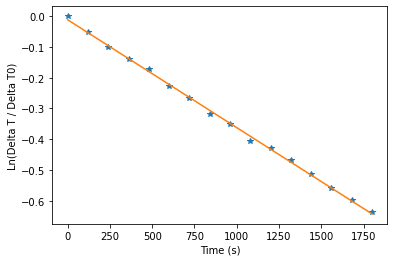

In [35]:
fig, ax = plt.subplots()
ax.plot(df_transientflow['Time (s)'], df_transientflow["Ln(Delta T/Delta T0 )"], "*")
ax.set_xlabel("Time (s)");
ax.set_ylabel("Ln(Delta T / Delta T0)");
t_fit = np.linspace(0,1800,2);
ax.plot(t_fit, fitFunc(t_fit));

In [36]:
c=4.2
rr=np.log(r_outinit/r_out)

In [53]:
k=(-1*fitTable.loc['value','slope']*(Water*c*rr))/(2*math.pi*fillline)
format(k, '.4f') 

'0.0361'

In [55]:
kcorrect=0.035
PercentError=np.abs((kcorrect-k)/kcorrect)*100
format(PercentError, '.2f') 

'3.28'

Since the value was calculated at approximately 0.036 and the reference value is 0.035 with a range of 0.002. The value found falls within that range of uncertainty. 